In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

In [5]:
pd.set_option("display.precision", 8)

# График функции:

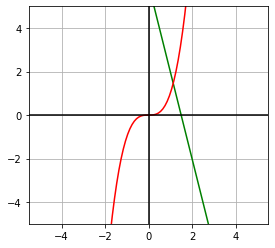

In [3]:
x = np.linspace(-5, 5, 100)
y = -4 * x + 6
z = x**3
fig, ax = plt.subplots()
plt.plot(x, y, 'g')
plt.plot(x, z, 'r')
ax.set_aspect('equal')
ax.grid(True, which='both')
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
plt.ylim([-5, 5])
plt.show()

# Функция:

In [1]:
def f(x):
    return 4 * x**3 + 1

# Метод бисекции:

In [5]:
a = 1
b = 2
x = []
f_x = []
listA = []
listB = []
error = []
for i in range(20):
    listA.append(a)
    listB.append(b)    
    x.append((a + b) / 2)
    f_x.append(f(x[i]))
    f_a = f(a)
    if f_a * f_x[i] > 0:
        a = x[i]
    else:
        b = x[i]
    error.append(b - a)
    if (b - a) <= 0.000001:
        break 

In [6]:
 data = {'x': x,
        'f(x)': f_x,
        'a': a,
        'b': b,
        'e': error
        }
df = pd.DataFrame(data)
df.index = np.arange(1, len(df) + 1)

In [7]:
df

,x,f(x),a,b,e
1,1.50000000,11.12500000,1.99999905,2,0.50000000
2,1.75000000,17.07812500,1.99999905,2,0.25000000
3,1.87500000,20.77539062,1.99999905,2,0.12500000
4,1.93750000,22.81958008,1.99999905,2,0.06250000
5,1.96875000,23.89248657,1.99999905,2,0.03125000
6,1.98437500,24.44188309,1.99999905,2,0.01562500
7,1.99218750,24.71984720,1.99999905,2,0.00781250
8,1.99609375,24.85964948,1.99999905,2,0.00390625
9,1.99804688,24.92975614,1.99999905,2,0.00195312
10,1.99902344,24.96486091,1.99999905,2,0.00097656


# Метод итераций:

In [15]:
l = 1 / 10
x = [1]
errors = [0]
for i in range(20):
    x.append(x[i] - l * (f(x[i])))
    errors.append(abs(x[i] - x[i + 1]))
    if errors[i + 1] <= 0.000001:
        break

In [16]:
 data = {'x': x,
         'e': errors
        }
df = pd.DataFrame(data)
df.index = np.arange(1, len(df) + 1)
df.replace(0, np.nan, inplace=True)

In [17]:
df

,x,e
1,1.00000000,NaN
2,0.60000000,0.40000000
3,0.43520000,0.16480000
4,0.31047206,0.12472794
5,0.20149387,0.10897819
6,0.09903969,0.10245418
7,-0.00125175,0.10029144
8,-0.10125175,0.10000000
9,-0.20094034,0.09968859
10,-0.29850633,0.09756599


# Метод Ньютона

In [18]:
x = [-1]
f_x = []
df_x = []
errors = []
for i in range(20):
    f_x.append(f(x[i]))
    df_x.append(9 * x[i]**2)
    x.append(x[i] - (f_x[i] / df_x[i]))
    errors.append(abs(x[i] - x[i + 1]))
    if abs(x[i] - x[i + 1]) <= 0.000001:
        break
del x[0]

In [19]:
data = {'x': x,
        'f(x)': f_x,
        'd(f)': df_x,
        'errors': errors
       }
df = pd.DataFrame(data)
df.index = np.arange(1, len(df) + 1)
df.replace(0, np.nan, inplace=True)

In [20]:
df

,x,f(x),d(f),errors
1,-0.77777778,-2.00000000,9.00000000,0.22222222
2,-0.70219199,-0.41152263,5.44444444,0.07558579
3,-0.69347186,-0.03869697,4.43766229,0.00872012
4,-0.69336129,-0.00047857,4.32812903,0.00011057
5,-0.69336127,-0.00000008,4.32674893,0.00000002


# Метод хорд

In [6]:
a = -1
b = 0
listA = []
listB = []
listC = []
e = 0.000001
if f(a) == 0:
    print(f'x = {a:.10f}')
if f(b) == 0:
    print(f'x = {b:.10f}')
i = 0
while True:
    c = a - (f(a) * (b - a)) / (f(b) - f(a));
    a = b;
    b = c;
    listC.append(c)
    listA.append(a)
    listB.append(b)
    if abs(f(c)) <= e:
        break

In [7]:
data = {
    'a': listA,
    'b': listB,
    'x': listC
}
df = pd.DataFrame(data)

In [8]:
df

,a,b,x
0,0.00000000,-0.25000000,-0.25000000
1,-0.25000000,-4.00000000,-4.00000000
2,-4.00000000,-0.26373626,-0.26373626
3,-0.26373626,-0.27726398,-0.27726398
4,-0.27726398,-1.31884117,-1.31884117
5,-1.31884117,-0.38207486,-0.38207486
6,-0.38207486,-0.46336680,-0.46336680
7,-0.46336680,-0.74326722,-0.74326722
8,-0.74326722,-0.59877202,-0.59877202
9,-0.59877202,-0.62482139,-0.62482139
